## Data Cleaning and Processing

In [1]:
#Importing data set as data frame
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

amazon_df = pd.read_csv("C:/Users/court/OneDrive/Desktop/WGU/D214/amz_us_price_prediction_dataset.csv")

#Inspecting data frame
amazon_df.head()

,uid,asin,title,stars,reviews,price,category,isBestSeller,boughtInLastMonth
0,1,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",4.5,0,139.99,Suitcases,False,2000
1,2,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,4.5,0,169.99,Suitcases,False,1000
2,3,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,4.6,0,365.49,Suitcases,False,300
3,4,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,4.6,0,291.59,Suitcases,False,400
4,5,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,4.5,0,174.99,Suitcases,False,400


In [2]:
#Inspecting data frame
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735414 entries, 0 to 1735413
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   category           object 
 7   isBestSeller       bool   
 8   boughtInLastMonth  int64  
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 107.6+ MB


In [3]:
#Identifying Unique Product Categories

amazon_df['category'].unique()

array(['Suitcases', "Men's Clothing", 'Consoles & Accessories',
       "Men's Shoes", "Men's Accessories", 'Vacuum Cleaners & Floor Care',
       'Televisions & Video Products', 'Additive Manufacturing Products',
       'Headphones & Earbuds', "Boys' Watches", "Girls' Clothing",
       "Boys' Clothing", 'Pregnancy & Maternity Products',
       'Shaving & Hair Removal Products', 'Fabric Decorating',
       'Industrial Materials', 'Smart Home: Security Cameras and Systems',
       'Office Electronics', 'Sports & Outdoor Play Toys',
       "Kids' Play Tractors", 'Slot Cars, Race Tracks & Accessories',
       'Video Games', 'Smart Home: Voice Assistants and Hubs',
       'Light Bulbs', 'Toys & Games', "Kids' Furniture",
       'Automotive Tires & Wheels', 'Wellness & Relaxation Products',
       'Automotive Tools & Equipment', 'Baby & Toddler Toys',
       "Kids' Play Boats", 'Computer Monitors', "Girls' Jewelry",
       'Luggage', 'Printmaking Supplies', "Women's Handbags",
       'Foot, 

In [4]:
#Printing the Number of Product Categories
print("The number of product categories is: ", len(amazon_df['category'].unique()))

The number of product categories is:  236


In [5]:
#Creating a DF with only Pet Supply Categories

pet_df = amazon_df[(amazon_df['category'] == 'Reptiles & Amphibian Supplies') | 
                   (amazon_df['category'] == 'Horse Supplies') | 
                   (amazon_df['category'] == 'Pet Bird Supplies') | 
                   (amazon_df['category'] == 'Small Animal Supplies') | 
                   (amazon_df['category'] == 'Dog Supplies') | 
                   (amazon_df['category'] == 'Cat Supplies') | 
                   (amazon_df['category'] == 'Fish & Aquatic Pets')]

pet_df.head()

,uid,asin,title,stars,reviews,price,category,isBestSeller,boughtInLastMonth
308889,452937,B09RF7X69Y,Dried grubs for Chicken -Alternative to Dried ...,4.7,285,28.49,Reptiles & Amphibian Supplies,False,100
308890,452938,B0CDQVMX2Y,Terra Health Essentials® Super Greens,0.0,0,59.00,Reptiles & Amphibian Supplies,False,0
308891,452939,B08H4R3VSZ,"MILIFUN Pet Heating Pad for Cats Dogs, Cat Hea...",4.2,403,18.69,Reptiles & Amphibian Supplies,False,50
308892,452940,B003LY6JT8,Watlow 050150C2-0001B All-Purpose Silicone Rub...,0.0,0,89.62,Reptiles & Amphibian Supplies,False,0
308893,452941,B003LY2J74,Watlow 040150C1 All-Purpose Silicone Rubber He...,0.0,0,76.93,Reptiles & Amphibian Supplies,False,0


In [6]:
#Checking data frame
pet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43116 entries, 308889 to 1535505
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uid                43116 non-null  int64  
 1   asin               43116 non-null  object 
 2   title              43116 non-null  object 
 3   stars              43116 non-null  float64
 4   reviews            43116 non-null  int64  
 5   price              43116 non-null  float64
 6   category           43116 non-null  object 
 7   isBestSeller       43116 non-null  bool   
 8   boughtInLastMonth  43116 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 3.0+ MB


In [7]:
#Checking for Duplicate Values
pet_df.duplicated().value_counts()

False    43116
dtype: int64

In [8]:
#Checking for Null Values
pet_df.isnull().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
category             0
isBestSeller         0
boughtInLastMonth    0
dtype: int64

In [9]:
#Checking Summary Statistics of DF
pet_df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,4.311600e+04,43116.000000,43116.000000,43116.000000,43116.00000
mean,1.341036e+06,3.814173,292.583148,27.058890,177.26714
std,4.625129e+05,1.421831,2269.714139,42.387706,574.16783
min,4.529370e+05,0.000000,0.000000,0.000000,0.00000
25%,9.959568e+05,3.900000,0.000000,10.990000,0.00000
50%,1.466448e+06,4.300000,0.000000,16.990000,0.00000
75%,1.726646e+06,4.600000,0.000000,28.535000,100.00000
max,2.000884e+06,5.000000,131149.000000,2750.000000,30000.00000


In [10]:
#Removing records that contain 0 for all numeric variables - treating as null values

#Finding number of records that contain 0 
stars_zero = []
reviews_zero = []
price_zero = []
bought_zero = []

for x in pet_df['stars']:
    if x == 0:
        stars_zero.append(x)

for x in pet_df['reviews']:
    if x == 0:
        reviews_zero.append(x)

for x in pet_df['price']:
    if x == 0:
        price_zero.append(x)

for x in pet_df['boughtInLastMonth']:
    if x == 0:
        bought_zero.append(x)

print("# records containing zeros for 'stars': ", len(stars_zero))
print("# records containing zeros for 'reviews': ", len(reviews_zero))
print("# records containing zeros for 'price': ", len(price_zero))
print("# records containing zeros for 'boughtInLastMonth': ", len(bought_zero))

# records containing zeros for 'stars':  4697
# records containing zeros for 'reviews':  33928
# records containing zeros for 'price':  769
# records containing zeros for 'boughtInLastMonth':  24296


In [11]:
#Dropping zeros from columns

pet_df = pet_df.drop(pet_df[pet_df['stars'] == 0].index)
pet_df = pet_df.drop(pet_df[pet_df['reviews'] == 0].index)
pet_df = pet_df.drop(pet_df[pet_df['price'] == 0].index)
pet_df = pet_df.drop(pet_df[pet_df['boughtInLastMonth'] == 0].index)

In [12]:
#Finding number of records that contain 0 - after dropping
stars_zero_clean = []
reviews_zero_clean = []
price_zero_clean = []
bought_zero_clean = []

for x in pet_df['stars']:
    if x == 0:
        stars_zero_clean.append(x)

for x in pet_df['reviews']:
    if x == 0:
        reviews_zero_clean.append(x)

for x in pet_df['price']:
    if x == 0:
        price_zero_clean.append(x)

for x in pet_df['boughtInLastMonth']:
    if x == 0:
        bought_zero_clean.append(x)

print("# records containing zeros for 'stars': ", len(stars_zero_clean))
print("# records containing zeros for 'reviews': ", len(reviews_zero_clean))
print("# records containing zeros for 'price': ", len(price_zero_clean))
print("# records containing zeros for 'boughtInLastMonth': ", len(bought_zero_clean))

# records containing zeros for 'stars':  0
# records containing zeros for 'reviews':  0
# records containing zeros for 'price':  0
# records containing zeros for 'boughtInLastMonth':  0


In [13]:
#Checking DF information
pet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5432 entries, 308889 to 1243960
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uid                5432 non-null   int64  
 1   asin               5432 non-null   object 
 2   title              5432 non-null   object 
 3   stars              5432 non-null   float64
 4   reviews            5432 non-null   int64  
 5   price              5432 non-null   float64
 6   category           5432 non-null   object 
 7   isBestSeller       5432 non-null   bool   
 8   boughtInLastMonth  5432 non-null   int64  
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 387.2+ KB


In [14]:
#Drop Columns Not Needed for Analysis and Create new DF

RFR_df = pet_df.drop(['uid', 'asin', 'title', 'category'], axis=1)

RFR_df.head()

,stars,reviews,price,isBestSeller,boughtInLastMonth
308889,4.7,285,28.49,False,100
308891,4.2,403,18.69,False,50
308903,3.6,241,23.99,False,200
308906,4.5,948,198.38,False,50
308910,4.1,140,15.99,False,300


## Exploratory Data Analysis

In [15]:
#Summary Statistics - stars
RFR_df['stars'].describe()

count    5432.000000
mean        4.352485
std         0.370885
min         1.000000
25%         4.200000
50%         4.400000
75%         4.600000
max         5.000000
Name: stars, dtype: float64

In [16]:
#Summary Statistics - reviews
RFR_df['reviews'].describe()

count      5432.000000
mean       1978.095913
std        5703.832403
min           1.000000
25%          76.000000
50%         361.500000
75%        1478.500000
max      108387.000000
Name: reviews, dtype: float64

In [17]:
#Summary Statistics - price
RFR_df['price'].describe()

count    5432.000000
mean       27.948947
std        40.708517
min         1.490000
25%        10.990000
50%        17.990000
75%        29.990000
max       699.990000
Name: price, dtype: float64

In [18]:
#Summary Statistics - boughtInLastMonth
RFR_df['boughtInLastMonth'].describe()

count     5432.000000
mean       393.068851
std        801.938080
min         50.000000
25%         50.000000
50%        100.000000
75%        400.000000
max      10000.000000
Name: boughtInLastMonth, dtype: float64

In [19]:
#Summary isBestSeller
counts_bestseller = RFR_df.isBestSeller.value_counts()
percs_bestseller = RFR_df.isBestSeller.value_counts(normalize=True)
pd.concat([counts_bestseller,percs_bestseller], axis=1, keys=['count', 'percentage'])

,count,percentage
False,5387,0.991716
True,45,0.008284


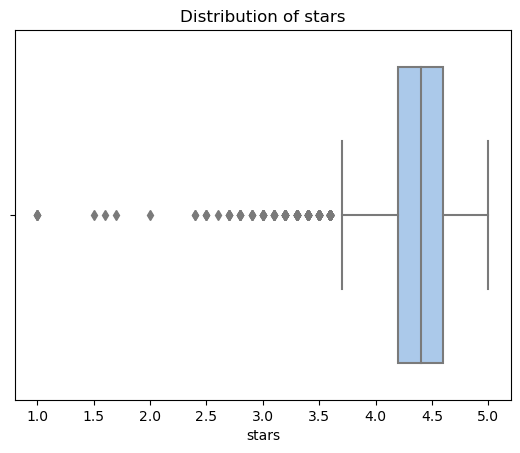

In [20]:
#Visualizations

import matplotlib.pyplot as plt
import seaborn as sns

#Boxplots and Outlier Identification
sns.set_palette("pastel")
sns.boxplot(RFR_df['stars'])
plt.title("Distribution of stars")
plt.show()

In [21]:
#Number of Outliers - Stars

stars_outlier = []

for x in RFR_df['stars']:
    Q1 = RFR_df['stars'].quantile(q=0.25)
    Q2 = RFR_df['stars'].quantile(q=0.5)
    Q3 = RFR_df['stars'].quantile(q=0.75)
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    if x > up_lim:
        stars_outlier.append(x)
    if x < low_lim:
        stars_outlier.append(x)

print("Number of outliers: ", len(stars_outlier))

Number of outliers:  240


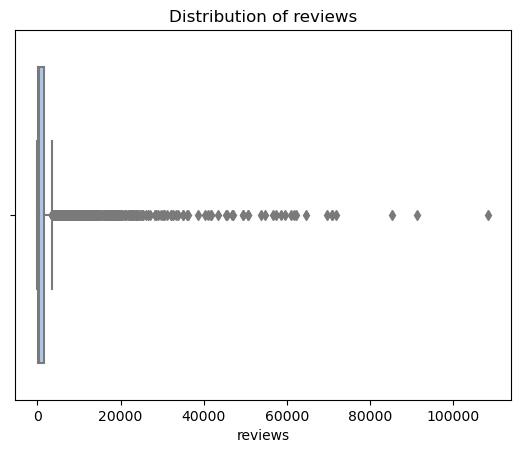

In [22]:
#Reviews
sns.boxplot(RFR_df['reviews'])
plt.title("Distribution of reviews")
plt.show()

In [23]:
#Number of Outliers - Reviews

reviews_outlier = []

for x in RFR_df['reviews']:
    RQ1 = RFR_df['reviews'].quantile(q=0.25)
    RQ2 = RFR_df['reviews'].quantile(q=0.5)
    RQ3 = RFR_df['reviews'].quantile(q=0.75)
    RIQR = RQ3 - RQ1
    Rlow_lim = RQ1 - 1.5 * RIQR
    Rup_lim = RQ3 + 1.5 * RIQR
    if x > Rup_lim:
        reviews_outlier.append(x)
    if x < Rlow_lim:
        reviews_outlier.append(x)

print("Number of outliers: ", len(reviews_outlier))

Number of outliers:  686


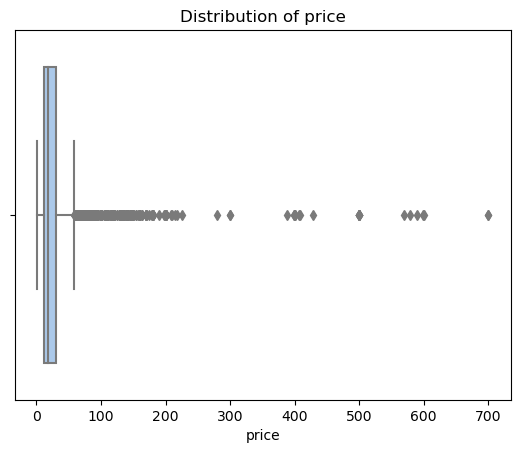

In [24]:
#Price
sns.boxplot(RFR_df['price'])
plt.title("Distribution of price")
plt.show()

In [25]:
#Number of Outliers - price

price_outlier = []

for x in RFR_df['price']:
    PQ1 = RFR_df['price'].quantile(q=0.25)
    PQ2 = RFR_df['price'].quantile(q=0.5)
    PQ3 = RFR_df['price'].quantile(q=0.75)
    PIQR = PQ3 - PQ1
    Plow_lim = PQ1 - 1.5 * PIQR
    Pup_lim = PQ3 + 1.5 * PIQR
    if x > Pup_lim:
        price_outlier.append(x)
    if x < Plow_lim:
        price_outlier.append(x)

print("Number of outliers: ", len(price_outlier))

Number of outliers:  460


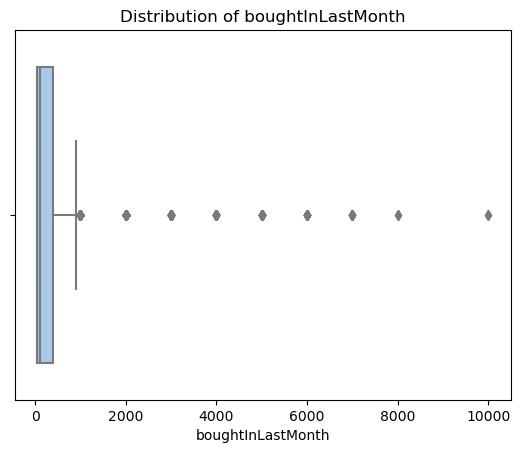

In [26]:
#boughtInLastMonth
sns.boxplot(RFR_df['boughtInLastMonth'])
plt.title("Distribution of boughtInLastMonth")
plt.show()

In [27]:
#Number of Outliers - boughtInLastMonth

boughtInLastMonth_outlier = []

for x in RFR_df['boughtInLastMonth']:
    BQ1 = RFR_df['boughtInLastMonth'].quantile(q=0.25)
    BQ2 = RFR_df['boughtInLastMonth'].quantile(q=0.5)
    BQ3 = RFR_df['boughtInLastMonth'].quantile(q=0.75)
    BIQR = BQ3 - BQ1
    Blow_lim = BQ1 - 1.5 * BIQR
    Bup_lim = BQ3 + 1.5 * BIQR
    if x > Bup_lim:
        boughtInLastMonth_outlier.append(x)
    if x < Blow_lim:
        boughtInLastMonth_outlier.append(x)

print("Number of outliers: ", len(boughtInLastMonth_outlier))

Number of outliers:  611


In [28]:
#Shapiro Wilk to check normality of variables
from scipy.stats import shapiro

In [29]:
#Shapiro Wilk - stars

shapiro(pet_df['stars'])

ShapiroResult(statistic=0.8909984230995178, pvalue=0.0)

In [30]:
#Shapiro Wilk - reviews
shapiro(pet_df['reviews'])

ShapiroResult(statistic=0.3342222571372986, pvalue=0.0)

In [31]:
#Shapiro Wilk - price
shapiro(pet_df['price'])

ShapiroResult(statistic=0.42047297954559326, pvalue=0.0)

In [32]:
#Shapiro Wilk - boughtInLastMonth
shapiro(pet_df['boughtInLastMonth'])

ShapiroResult(statistic=0.4415370225906372, pvalue=0.0)

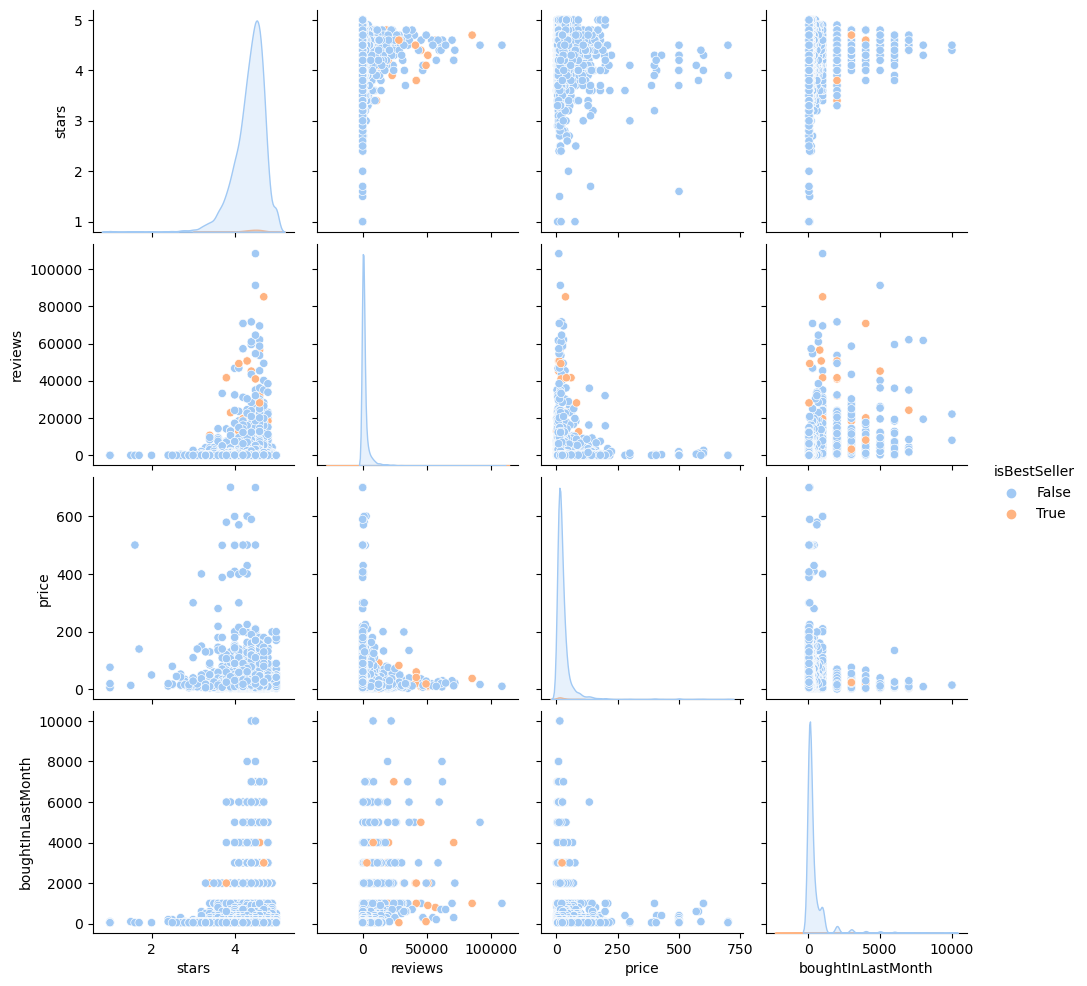

In [33]:
#Pairplot to visualize variables
sns.set_palette("pastel")
sns.pairplot(RFR_df, hue='isBestSeller')
plt.show()

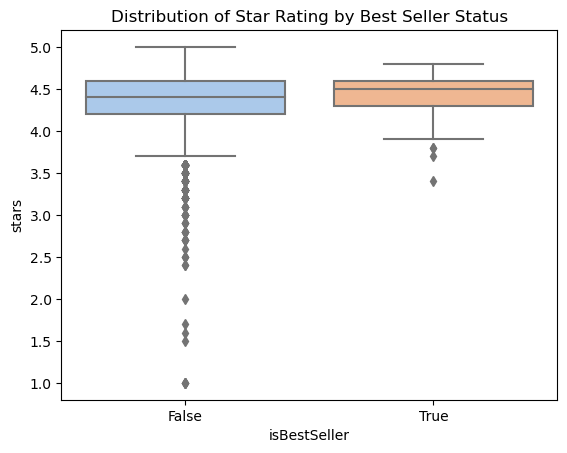

In [34]:
#Boxplots of BestSeller vs. each continuous variable

#stars
sns.boxplot(x='isBestSeller', y='stars', data=RFR_df)
plt.title('Distribution of Star Rating by Best Seller Status')
plt.show()

In [35]:
#Stars
stars = RFR_df

stars.groupby('isBestSeller')['stars'].describe()

,count,mean,std,min,25%,50%,75%,max
isBestSeller,,,,,,,,
False,5387.0,4.352237,0.371492,1.0,4.2,4.4,4.6,5.0
True,45.0,4.382222,0.290993,3.4,4.3,4.5,4.6,4.8


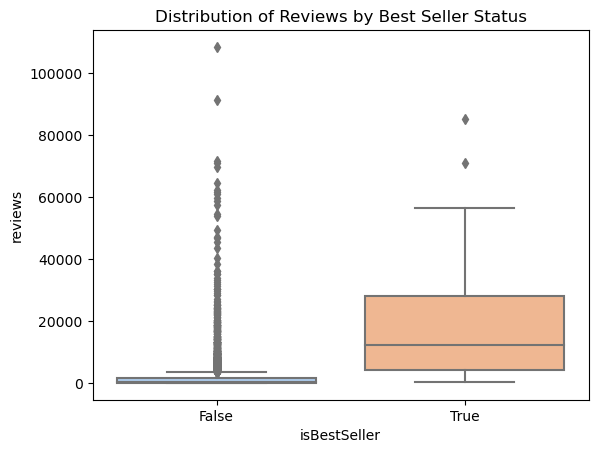

In [36]:
#reviews
sns.boxplot(x='isBestSeller', y='reviews', data=RFR_df)
plt.title('Distribution of Reviews by Best Seller Status')
plt.show()

In [37]:
#Reviews
reviews = RFR_df
reviews.groupby('isBestSeller')['reviews'].describe()

,count,mean,std,min,25%,50%,75%,max
isBestSeller,,,,,,,,
False,5387.0,1830.677371,5168.389748,1.0,75.0,353.0,1432.5,108387.0
True,45.0,19625.733333,20608.098085,382.0,4074.0,12269.0,28183.0,85187.0


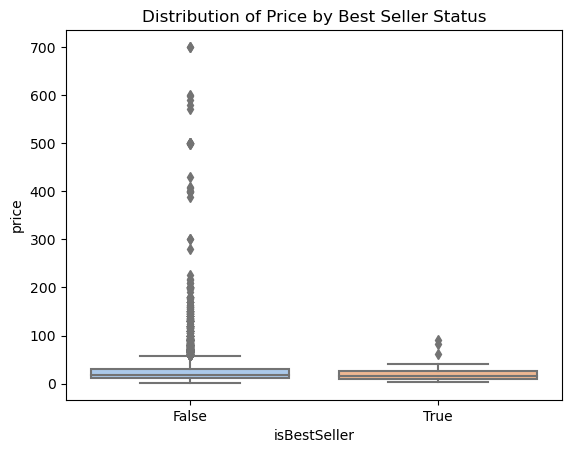

In [38]:
#price
sns.boxplot(x='isBestSeller', y='price', data=RFR_df)
plt.title('Distribution of Price by Best Seller Status')
plt.show()

In [39]:
#price
price = RFR_df
price.groupby('isBestSeller')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
isBestSeller,,,,,,,,
False,5387.0,28.003282,40.839893,1.49,10.99,17.99,29.99,699.99
True,45.0,21.444444,18.433445,2.50,9.99,14.99,26.99,91.50


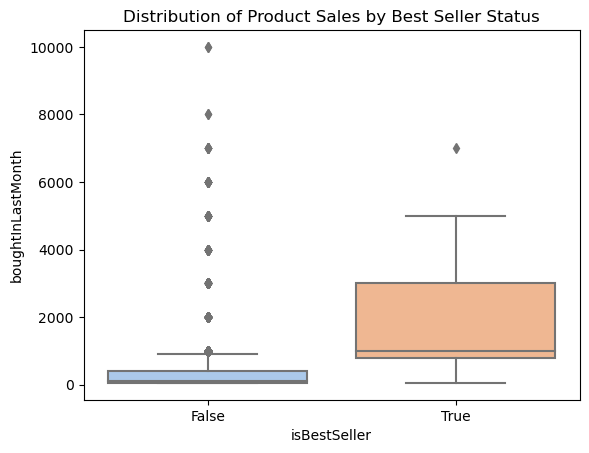

In [40]:
#boughtInLastMonth
sns.boxplot(x='isBestSeller', y='boughtInLastMonth', data=RFR_df)
plt.title('Distribution of Product Sales by Best Seller Status')
plt.show()

In [41]:
#boughtInLastMonth
bought = RFR_df
bought.groupby('isBestSeller')['boughtInLastMonth'].describe()

,count,mean,std,min,25%,50%,75%,max
isBestSeller,,,,,,,,
False,5387.0,380.768517,778.856029,50.0,50.0,100.0,400.0,10000.0
True,45.0,1865.555556,1699.459213,50.0,800.0,1000.0,3000.0,7000.0


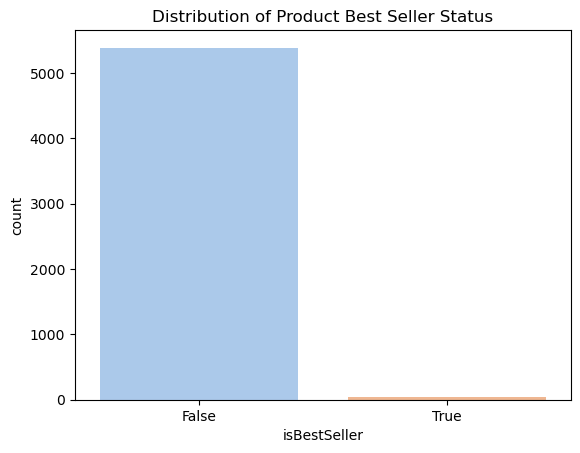

In [42]:
#isBestSeller Countplot
sns.set_palette("pastel")
sns.countplot(x=RFR_df['isBestSeller'])
plt.title("Distribution of Product Best Seller Status")
plt.show()


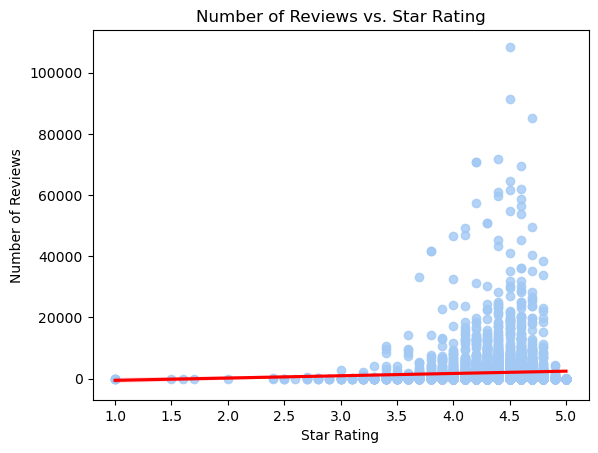

In [43]:
#Bivariate Visualizations

#Scatterplots

#Stars vs Reviews
sns.regplot(x='stars', y='reviews', data=RFR_df, line_kws = {'color' : 'red'})
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews vs. Star Rating')
plt.show()

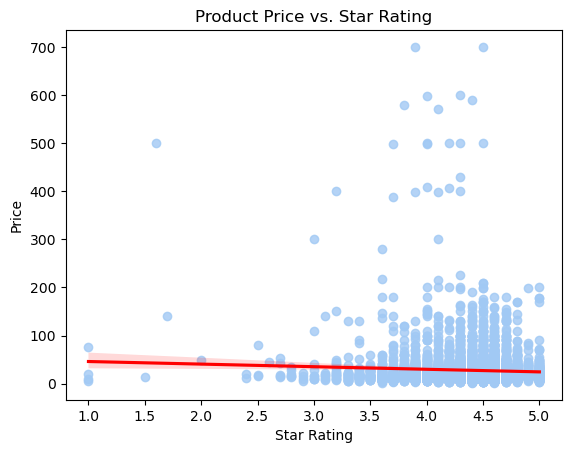

In [44]:
#Stars vs Price
sns.regplot(x='stars', y='price', data=RFR_df, line_kws = {'color' : 'red'})
plt.xlabel('Star Rating')
plt.ylabel('Price')
plt.title('Product Price vs. Star Rating')
plt.show()

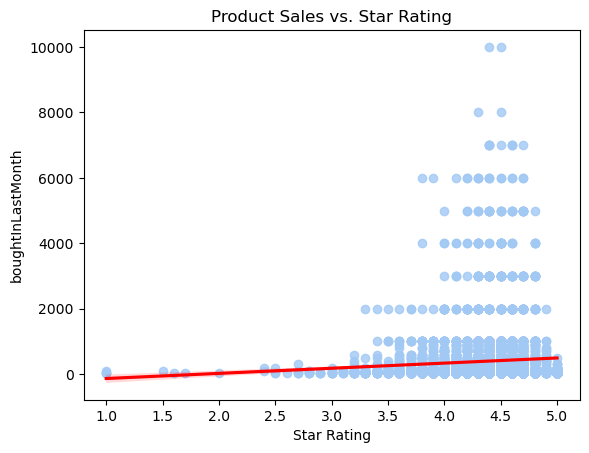

In [45]:
#Stars vs boughtInLastMonth
sns.regplot(x='stars', y='boughtInLastMonth', data=RFR_df, line_kws = {'color' : 'red'})
plt.xlabel('Star Rating')
plt.ylabel('boughtInLastMonth')
plt.title('Product Sales vs. Star Rating')
plt.show()

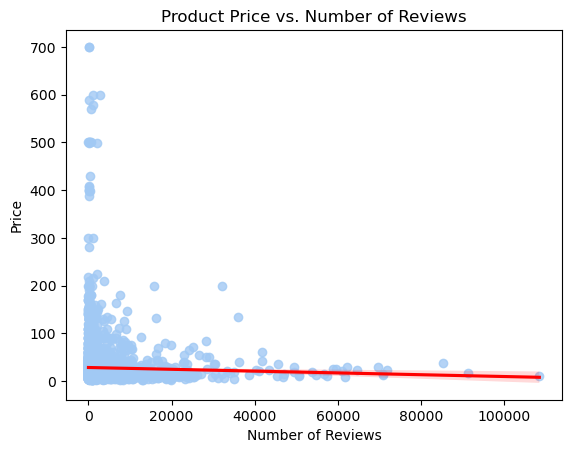

In [46]:
#Reviews vs price
sns.regplot(x='reviews', y='price', data=RFR_df, line_kws = {'color' : 'red'})
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Product Price vs. Number of Reviews')
plt.show()

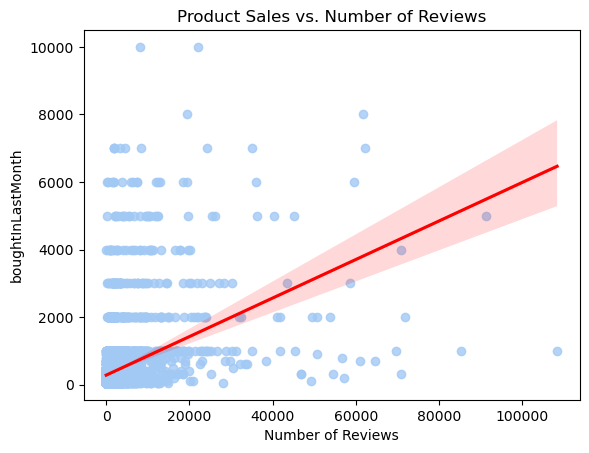

In [47]:
#Reviews vs boughtInLastMonth
sns.regplot(x='reviews', y='boughtInLastMonth', data=RFR_df, line_kws = {'color' : 'red'})
plt.xlabel('Number of Reviews')
plt.ylabel('boughtInLastMonth')
plt.title('Product Sales vs. Number of Reviews')
plt.show()

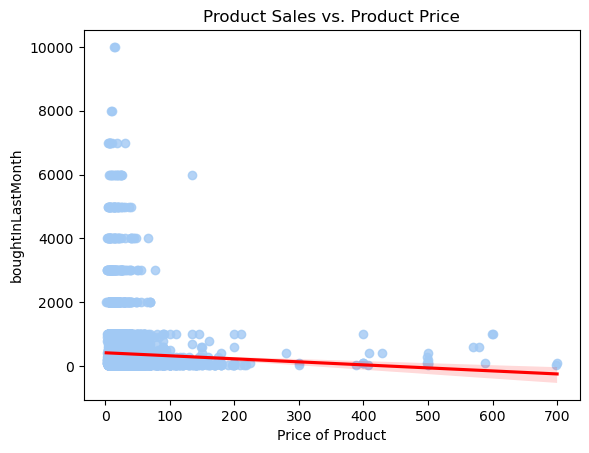

In [48]:
#Price
sns.regplot(x='price', y='boughtInLastMonth', data=RFR_df, line_kws = {'color' : 'red'})
plt.xlabel('Price of Product')
plt.ylabel('boughtInLastMonth')
plt.title('Product Sales vs. Product Price')
plt.show()

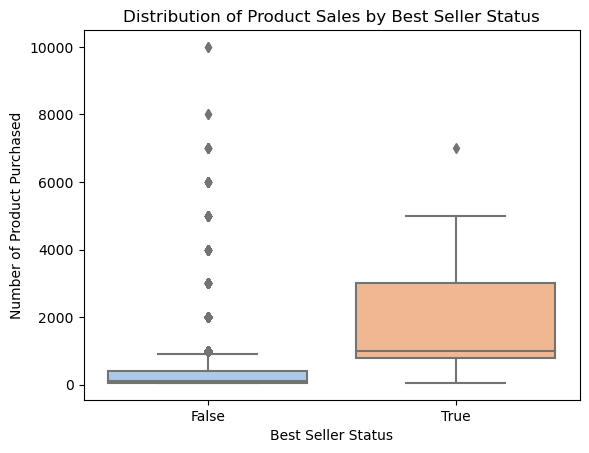

In [49]:
#Bought in Last Month vs Best Seller status
sns.set_palette("pastel")
sns.boxplot(x = 'isBestSeller', y='boughtInLastMonth', data=RFR_df)
plt.xlabel('Best Seller Status')
plt.ylabel('Number of Product Purchased')
plt.title('Distribution of Product Sales by Best Seller Status')
plt.show()

In [50]:
#Correlation

from scipy.stats import pointbiserialr
from scipy.stats import pearsonr

print("The correlation between best seller and boughtInLastMonth is: ", pointbiserialr(RFR_df['isBestSeller'], RFR_df['boughtInLastMonth']))
print("The correlation between best seller and stars is: ", pointbiserialr(RFR_df['isBestSeller'], RFR_df['stars']))
print("The correlation between best seller and reviews is: ", pointbiserialr(RFR_df['isBestSeller'], RFR_df['reviews']))
print("The correlation between best seller and price is: ", pointbiserialr(RFR_df['isBestSeller'], RFR_df['price']))

The correlation between best seller and boughtInLastMonth is:  PointbiserialrResult(correlation=0.1678352940595801, pvalue=1.306723495704172e-35)
The correlation between best seller and stars is:  PointbiserialrResult(correlation=0.007328742330242407, pvalue=0.5891786438433975)
The correlation between best seller and reviews is:  PointbiserialrResult(correlation=0.2828085692742072, pvalue=1.9535126237818076e-100)
The correlation between best seller and price is:  PointbiserialrResult(correlation=-0.014604999622563808, pvalue=0.281824918180843)


In [51]:
#https://stackoverflow.com/questions/75966430/how-to-include-p-values-in-heatpmap

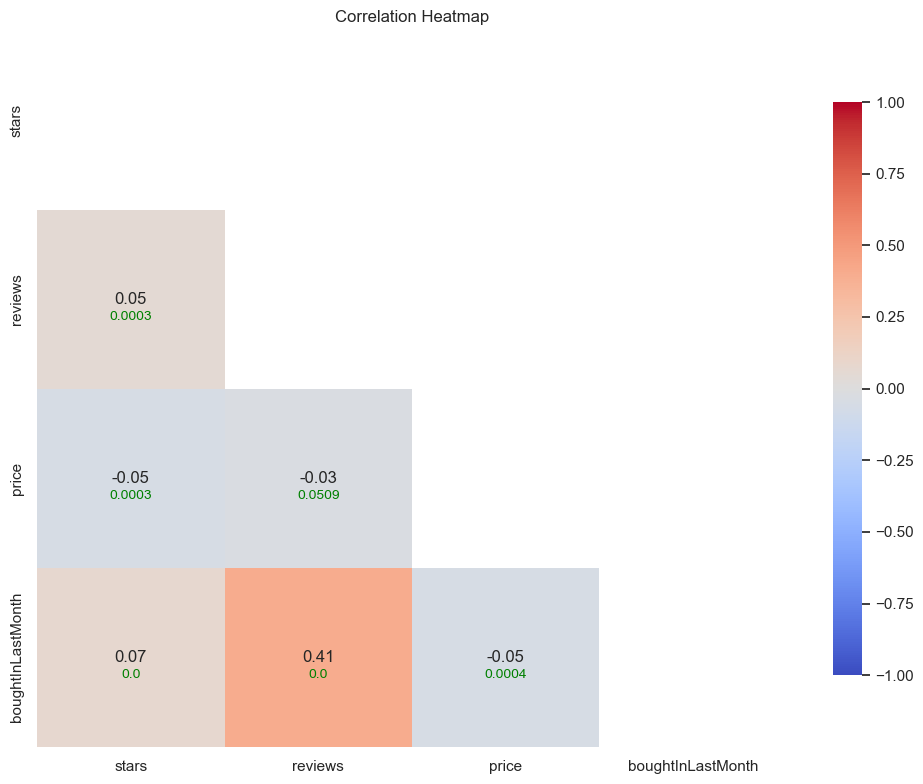

In [52]:
# Calculate the correlation matrix using Pearson correlation coefficients 
cont_df = RFR_df.drop(['isBestSeller'], axis=1)

corr_matrix = cont_df.corr(method='pearson')

# Calculate the p-values for the correlation coefficients
pvalues = round(cont_df.corr(method=lambda x, y: pearsonr(x, y)[1]), 4)

# Generate the heatmap of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, cbar_kws={'shrink': 0.8},
            ax=ax, vmin=-1, vmax=1, center=0)

# Update the heatmap labels with correlation coefficients and p-values
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        if i >= j:
            continue
        corr = '{:f}'.format(corr_matrix.iloc[i, j]),
        pval = pvalues.iloc[i, j]
        ax.text(j+0.5, i+0.5, corr, ha='center', va='center', fontsize=10, color='white')
        ax.text(i+0.5, j+0.6, pval, ha='center', va='center', fontsize=10, color='green')

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
plt.close()

In [53]:
#Encoding Best Seller
RFR_df['isBestSeller'].replace([False, True], [0,1], inplace=True)
    
RFR_df.head()

,stars,reviews,price,isBestSeller,boughtInLastMonth
308889,4.7,285,28.49,0,100
308891,4.2,403,18.69,0,50
308903,3.6,241,23.99,0,200
308906,4.5,948,198.38,0,50
308910,4.1,140,15.99,0,300


## RFR Model

In [54]:
#Importing Necessary Packages/Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [55]:
#Defining X and y for the Random Forest Regressor

X = RFR_df.drop(['boughtInLastMonth'], axis = 1)
y = RFR_df['boughtInLastMonth']

In [56]:
#Splitting the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 19)

In [57]:
#Building an Initial Model - using default parameters of sklearn RFR

init_model = RandomForestRegressor(random_state = 19)

init_model.fit(X_train, y_train)

RandomForestRegressor(random_state=19)

In [58]:
init_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 19,
 'verbose': 0,
 'warm_start': False}

In [59]:
#Evaluating Initial model
#Predict the test set labels
y_pred = init_model.predict(X_test)

#Mean Absolute Error
from sklearn.metrics import mean_absolute_error as mae

#Evaluate MAE

mae_init = mae(y_test, y_pred)

#Print the test set MSE
print("Test set MAE of the init_model is ", mae_init)


Test set MAE of the init_model is  366.2694609544849


In [60]:
#R2/Accuracy of Initial Model
print("R2 on training set: ", init_model.score(X_train, y_train))
print("R2 on test set: ", init_model.score(X_test, y_test))

R2 on training set:  0.8785814316664842
R2 on test set:  0.1445704526487852


In [ ]:
#Hyperparameter Tuning Using Grid Search CV

param_dist = {"max_depth": [4, 6, 8, 10, 12, None],
              "max_features": range(1, 5),
              "n_estimators": np.arange(50, 300, 15)}

rfr = RandomForestRegressor(random_state=19)

grid_search = GridSearchCV(estimator = rfr,
                                   param_grid = param_dist,
                                   cv = 5,
                          scoring = 'neg_mean_absolute_error')
                                  

grid_search.fit(X, y)

grid_search.best_estimator_

In [61]:
#Tuned Model
rf_model = RandomForestRegressor(n_estimators = 215, max_depth = 8, 
                                 max_features = 2, random_state = 19)

rf_model.fit(X_train, y_train)

#Predict the test set labels
y_predictions = rf_model.predict(X_test)

#Evaluate the test set MSE & RMSE

mae_rf = mae(y_test, y_predictions)

#Print the MAE
print("The MAE of the rf_model is ", mae_rf)

The MAE of the rf_model is  332.04503639189664


In [62]:
#R2/Accuracy of Tuned Model
print("R2 on training set: ", rf_model.score(X_train, y_train))
print("R2 on test set: ", rf_model.score(X_test, y_test))

R2 on training set:  0.5121882122162628
R2 on test set:  0.2501754007330401


In [63]:
#Further hyperparameter tuning to reduce overfitting: Reducing max_depth to 6
rf2_model = RandomForestRegressor(n_estimators = 215, max_depth = 6,
                                  max_features = 2, random_state = 19)

rf2_model.fit(X_train, y_train)

#Predict the test set labels
y_predictions = rf2_model.predict(X_test)

#Evaluate MAE
mae_rf = mae(y_test, y_predictions)

#Print the MAE
print("The MAE of the rf2_model is ", mae_rf)

The MAE of the rf2_model is  332.41249940094434


In [64]:
#R2/Accuracy of Further Tuned Model
print("R2 on training set: ", rf2_model.score(X_train, y_train))
print("R2 on test set: ", rf2_model.score(X_test, y_test))

R2 on training set:  0.39932603704124425
R2 on test set:  0.25432444440881974


In [65]:
#Further hyperparameter tuning to reduce overfitting - Reducing Max Depth to 4
rf3_model = RandomForestRegressor(n_estimators = 215, max_depth = 4,
                                  max_features = 2, random_state = 19)

rf3_model.fit(X_train, y_train)

#Predict the test set labels
y_predictions = rf3_model.predict(X_test)

#Evaluate MAE
mae_rf = mae(y_test, y_predictions)

#Print the MAE
print("The MAE of the rf3_model is ", mae_rf)

The MAE of the rf3_model is  336.892110779895


In [66]:
#R2/Accuracy of Model 3
print("R2 on training set: ", rf3_model.score(X_train, y_train))
print("R2 on test set: ", rf3_model.score(X_test, y_test))

R2 on training set:  0.3063304594236177
R2 on test set:  0.24941161204593676


In [67]:
#Further hyperparameter tuning - Reducing Max Depth to 2
rf4_model = RandomForestRegressor(n_estimators = 215, max_depth = 2,
                                  max_features = 2, random_state = 19)

rf4_model.fit(X_train, y_train)

#Predict the test set labels
y_predictions = rf4_model.predict(X_test)

#Evaluate MAE
mae_rf = mae(y_test, y_predictions)

#Print the MAE
print("The MAE of the rf4_model is ", mae_rf)

The MAE of the rf4_model is  356.40866034466575


In [68]:
#R2/Accuracy
print("R2 on training set: ", rf4_model.score(X_train, y_train))
print("R2 on test set: ", rf4_model.score(X_test, y_test))

R2 on training set:  0.22205787116508813
R2 on test set:  0.20705697542466728


In [69]:
#Final Model: Model 3 - highest accuracy (25%) with lowest overfitting issues
final_model = rf3_model

#Identifying which features the RFR model used to make predictions
importances = pd.DataFrame({'Importance': final_model.feature_importances_},
                           index=X_train.columns)

importances.sort_values(by="Importance", ascending = False)

,Importance
reviews,0.787061
price,0.117176
isBestSeller,0.049855
stars,0.045908


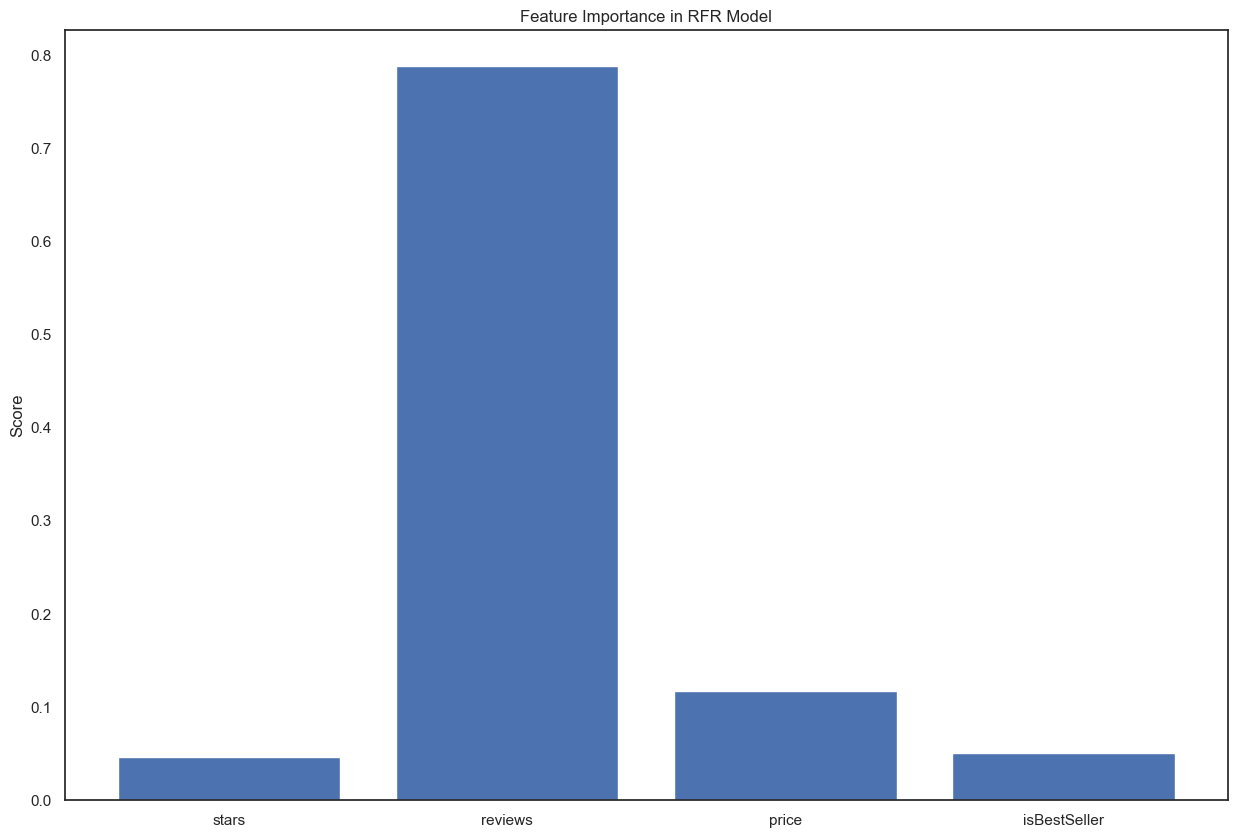

In [70]:
#Feature Importances
plt.figure(figsize = (15, 10))
plt.bar(final_model.feature_names_in_, final_model.feature_importances_)
plt.ylabel('Score')
plt.title("Feature Importance in RFR Model")
plt.show()